<a href="https://colab.research.google.com/github/kaushalishaan/dsbook/blob/master/elab2go_Demo_PY4_PredMaintApp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="width:100%;text-align: left; padding: 10px;">
<h1> elab2go demo PY4:
     <br> Predictive maintenance with scikit-learn
</h1>
<p>
This Jupyter Notebook from the <a href="http://elab2go.de">elab2go-Mobile Engineering Lab</a>
shows the use of scikit-learn classification methods using an automobile data set as an example
in data analysis and prediction as part of a predictive maintenance scenario.
To get started, the DecisionTreeClassifier is used, which can be used to create a decision tree prediction model.
</p>
</div>


<h2>
    1. Importiere benötigte Bibliotheken
    </h2>

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split

<h2>
    2. Read in data
     </h2>
     <p>
     We read in the automotive data set “automotive_data.csv” and output the first three lines for checking.
         <br>-- The csv file is on elab2go.de.
         <br>-- The first column with index 0 is the index column/row heading.
         <br>-- We use the usecols parameter to use only part of the columns as features.
      </p>
      

In [15]:

# Function for formatted output of a DataFrame
def display_dataframe( df, rows=6, cols=6):
    with pd.option_context('display.max_rows', rows,
                    'display.max_columns', cols):
        display(df);

In [16]:
# Lese CSV-Datei ein
file = 'https://www.elab2go.de/demo-py4/automotive_data_train_140.csv'
NRCOLS = 23
COLS = np.arange(0,NRCOLS,1).tolist() # Feature columns: [0, 1,....,23]
df = pd.read_csv(file, header=0, sep = ";", index_col=0, usecols=COLS)
# Display an excerpt of the data for inspection
display_dataframe(df)

,Ausfall,Kuehlmitteltemp,EinspritzmKurz,...,Kraftstoffeinsatz,EVAPDruck,Luftdruck
Messungsnr,,,,,,,
M_001,nein,2.8,0.9,...,1.1,1.9,2.5
M_002,ja,9.9,24.6,...,0.7,2.8,2.8
M_003,nein,3.4,28.5,...,0.9,0.1,0.1
...,...,...,...,...,...,...,...
M_138,nein,1.0,7.9,...,1.3,0.3,0.3
M_139,ja,4.3,10.7,...,2.0,2.9,3.1
M_140,nein,3.7,4.9,...,0.7,0.4,0.6


<h2>
     3. Extract and prepare data
     </h2>
     <p>
     The characteristic values (all columns from column 1) are first extracted into a new DataFrame using <b>iloc</b>
     and then converted to a NumPy array x using the Pandas <b>to_numpy()</b> method.
     The “Failure” column is then extracted into an array y as the target variable.
     </p>

In [17]:
# Extract features into a NumPy array x
merkmale = df.iloc[:,1:];
x = merkmale.to_numpy()
print("Merkmale x:\n" + str(x))

# Extract target variable into a Numpy array y
y = df[['Ausfall']]
y = y.values

# Output the first three values for checking
print("Zielvariable y:\n" + str(y[1:4]))

Merkmale x:
[[ 2.8  0.9  3.8 ...  1.1  1.9  2.5]
 [ 9.9 24.6 15.  ...  0.7  2.8  2.8]
 [ 3.4 28.5  8.7 ...  0.9  0.1  0.1]
 ...
 [ 1.   7.9 29.7 ...  1.3  0.3  0.3]
 [ 4.3 10.7 13.7 ...  2.   2.9  3.1]
 [ 3.7  4.9 30.7 ...  0.7  0.4  0.6]]
Zielvariable y:
[['ja']
 ['nein']
 ['ja']]


<h2>
     4. Splitting the data into training data and test data
</h2>
<p>
The <b>train_test_split()</b> method takes the arrays x and y as input parameters and returns four arrays:
     <br>X_train: training characteristics, y_train: training target variable
     <br>X_test: test characteristics, y_test: test target variable
  <br> The test_size parameter controls the size of the test data set, here: 30%.
</p>

In [18]:
# 70% Trainingsdaten und 30% Testdaten
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
print("X_test (First three lines):");
print(X_test[0:3])
print("y_test (First three lines):");
print(y_test[0:3])

X_test (First three lines):
[[ 1.9  1.6  2.7  4.5 31.   4.9  0.7  1.4  1.5  0.4  0.9  0.4  0.   2.
   3.   2.9  2.3  1.9  1.2  2.7  2.4]
 [ 5.6  9.7 27.1  8.5  6.4  4.6  2.   1.3  0.9  0.7  0.8  0.7  0.2  3.1
   2.8  2.3  1.8  1.4  1.6  0.3  0.5]
 [ 3.1  6.6 28.6  5.9  6.3  3.6  2.1  2.1  1.7  1.4  1.3  1.   1.4  1.6
   1.8  1.7  1.8  2.   2.1  2.7  2.7]]
y_test (First three lines):
[['ja']
 ['ja']
 ['ja']]


<h2>
     5. Create predictive model
     </h2>
<p>
The prediction model for the training data (X_train, y_train) is created using the <b>fit()</b> method of the scikit-learn DecisionTreeClassifier. The DecisionTreeClassifier uses an optimized version of the CART algorithm. Creating the model as an instance of the DecisionTreeClassifier class sets various configuration parameters that control how exactly the decision tree is constructed.
</p>

In [19]:
# Create model as an instance of DecisionTreeClassifier class
model = DecisionTreeClassifier(criterion='entropy',
                               splitter='best',
                               min_samples_split= 0.25,
                               min_samples_leaf = 0.1,
                               max_features=10,
                               max_depth=5);
# Create decision tree for (X_train, y_train)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features=10,
                       min_samples_leaf=0.1, min_samples_split=0.25)

<h2> 6. Visualize prediction model </h2>
<p>
     The visualization of the decision tree is done using the library
<a href="http://www.graphviz.org/" target = "_blank"><b>Graphviz</b></a> and the method
     <a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html" target="_blank">
     <b>sklearn.tree.export_graphviz()</b></a> created.
Graphviz is an open source graph visualization program package.
Graphviz takes all the instructions needed to create the graphic from a text file,
which contains a description of the nodes and edges of the graph, namely
in the <a href="https://graphviz.gitlab.io/_pages/pdf/dotguide.pdf" target="_blank">DOT</b></a> description language for the visual representation of graphs.
</p>
<p>
First, in lines 2-5, the decision tree is exported into the graphviz DOT format using the export_graphviz() function. A graph is then created from this in line 7 and displayed in line 8 in the Jupyter Notebook output.
</p>

<h3>6.1 Visualisierung mit Graphviz</h3>

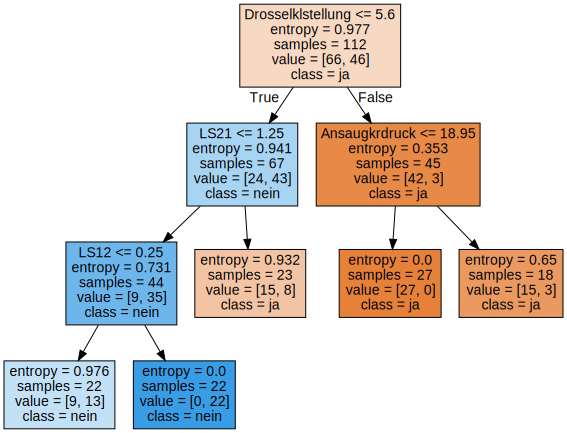

In [20]:
# Generate dot source code
import graphviz as gv
dot=export_graphviz(model, out_file=None,filled=True,
                           feature_names=df.columns[1:NRCOLS],
                           class_names=['ja','nein']);
# Generate Graphviz graphs from dot source code
graph = gv.Source(dot)
display(graph)

<h3>6.2 Visualization with plot_tree()</h3>

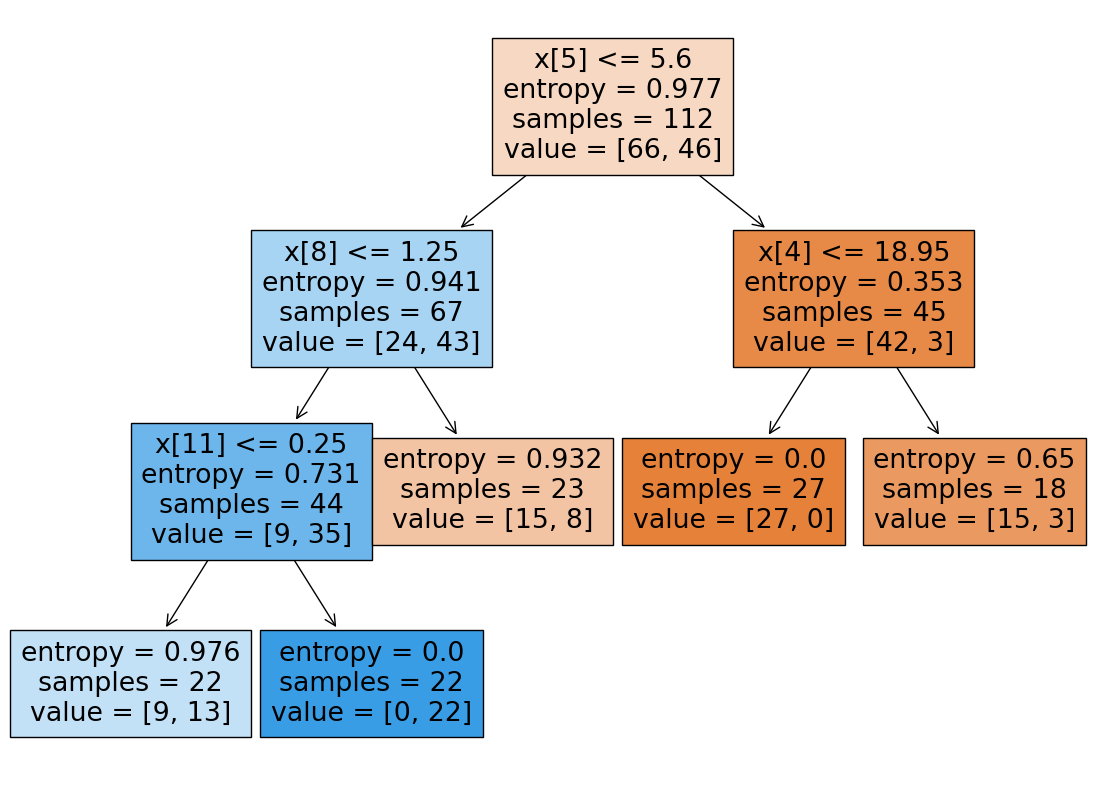

In [21]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.subplots(figsize=(14, 10))
tree.plot_tree(model, filled=True)
plt.show()

<h2>
  7. Performance metrics
</h2>
<p>
To validate a prediction model such as the decision tree, one uses metrics that indicate how well the value of the target variable is predicted by the corresponding model. The most important key figures that are mapped by scikit-learn methods are:
<ul>
<li>Trust probability (accuracy):
     <br>- The probability that a correct prediction will be made for an observation.
<li> Accuracy:
<br> - The probability that the prediction of a failure is correct.
     </li>
<li>Sensitivity/hit rate (recall or true positive rate):
<br> - The probability that a failure is predicted for an observation "failed".
     </li>
     </ul>

First, a prediction is created based on the decision tree and the test data. The <b>predict()</b> method receives as parameters the test data sets (30% of the data that was not used to build the model) and returns a vector y_pred with predictions: "yes" means failure, "no " means no failure.
</p>

In [22]:
y_pred = model.predict(X_test)
y_pred

array(['ja', 'nein', 'ja', 'ja', 'ja', 'ja', 'ja', 'ja', 'nein', 'nein',
       'ja', 'ja', 'ja', 'nein', 'nein', 'ja', 'nein', 'nein', 'ja', 'ja',
       'ja', 'nein', 'nein', 'ja', 'nein', 'nein', 'ja', 'ja'],
      dtype=object)

<h2>
  8. Determine the accuracy of the prediction
</h2>
<p>
After the prediction array y_pred has been determined, the performance metrics described above can be calculated using the <b>accuracy_score(), precision_score() and recall_score()</b> functions.
<br>With the set configuration parameters (criterion='entropy', splitter='best', min_samples_split=0.25, max_features=10, ...) we achieve good key figures depending on the size of the data set.
</p>

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print('PERFORMANCE KEY FIGURES:')
# Vertrauenswahrscheinlichkeit
print("Accuracy: %.2f%%" % (100 * accuracy_score(y_test, y_pred)))
# Trefferquote
print("Recall: %.2f%%" % (100 * recall_score(y_test, y_pred, pos_label='ja', average='binary')))
# Genauigkeit
print("Precision: %.2f%%" % (100 * precision_score(y_test, y_pred, pos_label='ja', average='binary')))

PERFORMANCE KEY FIGURES:
Accuracy: 71.43%
Recall: 80.00%
Precision: 70.59%


<h2>
9. Create prediction for a new data set
</h2>
<p>
After an optimal decision model is found, it can be used to classify new data sets.
<br>For the four new observations M_137 to M_140, failure is predicted in three cases.
</p>

In [24]:
# Read in a new data record
dftest = pd.read_csv('https://www.elab2go.de/demo-py4/automotive_data_test_4.csv', header=0, sep = ";", index_col=0, usecols=COLS)
display_dataframe(dftest)

,Ausfall,Kuehlmitteltemp,EinspritzmKurz,...,Kraftstoffeinsatz,EVAPDruck,Luftdruck
Messungsnr,,,,,,,
M_141,NaN,2.6,0.9,...,1.1,2.0,2
M_142,NaN,9.2,22.7,...,0.7,2.6,2
M_143,NaN,3.2,28.5,...,0.9,0.2,1
M_144,NaN,2.8,2.6,...,0.8,0.4,0


In [25]:
# Extract the features from the new dataset
merkmale = dftest.iloc[:,1:];
X = merkmale.to_numpy()
# Create the prediction
y_pred = model.predict(X)
dftest['Ausfall'] = y_pred
display_dataframe(dftest)

,Ausfall,Kuehlmitteltemp,EinspritzmKurz,...,Kraftstoffeinsatz,EVAPDruck,Luftdruck
Messungsnr,,,,,,,
M_141,ja,2.6,0.9,...,1.1,2.0,2
M_142,nein,9.2,22.7,...,0.7,2.6,2
M_143,ja,3.2,28.5,...,0.9,0.2,1
M_144,ja,2.8,2.6,...,0.8,0.4,0
